In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import models,layers
from tensorflow.python.keras.utils.data_utils import Sequence
from keras.optimizers import Adam
import numpy as np


In [ ]:
train_path = '/content/drive/MyDrive/APPLE/train'
test_path = '/content/drive/MyDrive/APPLE/test'

In [ ]:
# Load the dataset
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical')

Found 8064 images belonging to 4 classes.


In [ ]:
test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical')

Found 1943 images belonging to 4 classes.


In [ ]:
import os

# Define the paths to the directories containing the images for each label
apple_scab_path = '/content/drive/MyDrive/APPLE/train/apple_scab'
black_rot_path = '/content/drive/MyDrive/APPLE/train/black_rot'
cedar_apple_rust_path = '/content/drive/MyDrive/APPLE/train/cedar_apple_rust'
healthy_path = '/content/drive/MyDrive/APPLE/train/healthy'

# Count the number of images in each directory
apple_scab_count = len(os.listdir(apple_scab_path))
black_rot_count = len(os.listdir(black_rot_path))
cedar_apple_rust_count = len(os.listdir(cedar_apple_rust_path))
healthy_count = len(os.listdir(healthy_path))

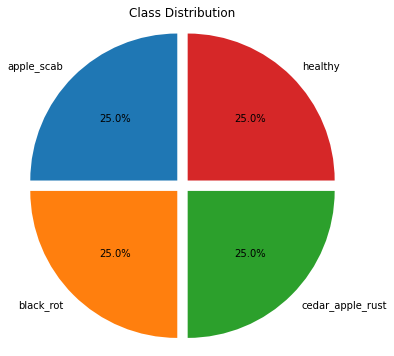

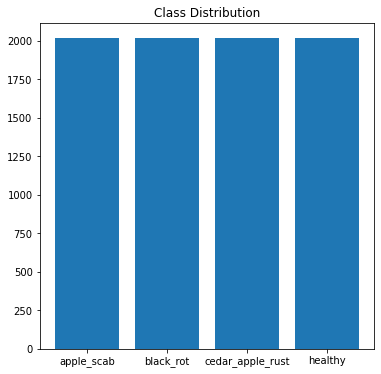

In [ ]:
import matplotlib.pyplot as plt 
# Define the labels and sizes for the pie chart 
labels = ['apple_scab', 'black_rot', 'cedar_apple_rust', 'healthy'] 
sizes = [apple_scab_count, black_rot_count, cedar_apple_rust_count, healthy_count] 
# Create the pie chart 
plt.figure(figsize=(6,6)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.05]*4) 
plt.title('Class Distribution') 
plt.axis('equal') 
plt.show() 
# Create the bar graph 
plt.figure(figsize=(6,6)) 
plt.bar(labels, sizes)
plt.title('Class Distribution') 
plt.show() 


# 5 layers CNN model 




In [ ]:
model =Sequential([
    Conv2D(filters =32,kernel_size =(3,3),activation ='relu',padding ='same',input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2),strides=2),#each  conv layer is followed by maxpool layer

    Conv2D(filters=64,kernel_size=(3,3),activation ='relu',padding ='same'),
    MaxPool2D(pool_size=(2,2),strides =2),

    Conv2D(filters=128,kernel_size=(3,3),activation ='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),

    Conv2D(filters=256,kernel_size =(3,3),activation ='relu',padding ='same'),
    MaxPool2D(pool_size =(2,2),strides=2),

    Conv2D(filters=128,kernel_size =(3,3),activation ='relu',padding ='same'),
    Flatten(),
    Dropout(0.5),#The dropout rate is set to 0.5, meaning that half of the neurons in each dense layer will be dropped out during each training iteration.
    Dense(units=4,activation='softmax')
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [ ]:
from keras.optimizers import Adam


from keras.metrics import categorical_crossentropy
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# ***Validation part***


In [ ]:
#Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='min')

In [ ]:
# Fit the model on the train data
r= model.fit(train_batches,
    validation_data=test_batches,
    epochs=20,
    steps_per_epoch=len(train_batches),
    validation_steps=len(test_batches),
    callbacks=[early_stopping]
)

Epoch 1/20
252/252 [==============================] - 2691s 11s/step - loss: 0.7969 - accuracy: 0.6505 - val_loss: 0.4750 - val_accuracy: 0.8209
Epoch 2/20
252/252 [==============================] - 152s 602ms/step - loss: 0.5209 - accuracy: 0.7934 - val_loss: 0.6052 - val_accuracy: 0.7694
Epoch 3/20
252/252 [==============================] - 154s 611ms/step - loss: 0.3177 - accuracy: 0.8769 - val_loss: 0.2621 - val_accuracy: 0.8981
Epoch 4/20
252/252 [==============================] - 156s 619ms/step - loss: 0.1971 - accuracy: 0.9232 - val_loss: 0.1621 - val_accuracy: 0.9346
Epoch 5/20
252/252 [==============================] - 152s 604ms/step - loss: 0.1687 - accuracy: 0.9359 - val_loss: 0.1067 - val_accuracy: 0.9629
Epoch 6/20
252/252 [==============================] - 156s 620ms/step - loss: 0.1117 - accuracy: 0.9608 - val_loss: 0.0814 - val_accuracy: 0.9696
Epoch 7/20
252/252 [==============================] - 155s 615ms/step - loss: 0.0991 - accuracy: 0.9656 - val_loss: 0.0621 - 

In [ ]:
predictions =model.predict(x=test_batches,steps=len(test_batches), verbose=0)

In [ ]:
#plot the loss
plt.plot(r.history['loss'],label='train')
plt.plot(r.history['val_loss'],label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plot the accuracy
plt.plot(r.history['accuracy'],label='train')
plt.plot(r.history['val_accuracy'],label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

In [ ]:
loss, acc = model.evaluate(test_batches, verbose=0)
print('Test accuracy:', acc)
print('Test Loss:',loss)

In [ ]:
print(model.evaluate(x=test_batches))

In [ ]:
test_batches.class_indices

In [ ]:
cm= confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions, axis=-1))

In [ ]:
import numpy as np
np.round(predictions)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cm_plot_labels=['0','1','2','3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Project/Trained model/balanced_cnn_model1.h5')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predict the class probabilities for the validation set using the model
y_pred = model.predict(test_batches)

# Convert the class probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true class labels for the validation set
y_true_labels = test_batches.classes

# Get the class names from the generator
class_names = list(test_batches.class_indices.keys())

# Calculate precision, recall, and F1 score separately for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_labels, y_pred_labels)

# Print the results for each class
for i, class_name in enumerate(class_names):
    print(f"Metrics for class '{class_name}':")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 score: {f1_score[i]}")
    print()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Predict the class probabilities for the validation set using the model
y_pred = model.predict(test_batches)

# Get the true class labels for the validation set
y_true_labels = test_batches.classes

# Calculate the ROC AUC score for each class
roc_auc_scores = roc_auc_score(y_true_labels, y_pred, multi_class='ovr')

# Print the overall ROC AUC score
print(f"Overall ROC AUC score: {roc_auc_scores}")

# **Predictions**

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array

In [ ]:
model = load_model('/content/drive/MyDrive/Project/Trained model/balanced_cnn_model1')
img = load_img('/content/drive/MyDrive/APPLE/test/apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG', target_size=(256, 256))
img_arr = img_to_array(img)

In [ ]:
img_arr = img_arr / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

In [ ]:
prediction = model.predict(img_arr)
class_label = np.argmax(prediction)

In [ ]:
class_names = {0: 'apple_scab', 1: 'black_rot', 2: 'cedar_apple_rust', 3: 'healthy'}
predicted_class = class_names[class_label]
print(predicted_class)